# IMDB MOVIEW REVIEW SENTIMENT ANALYSIS 

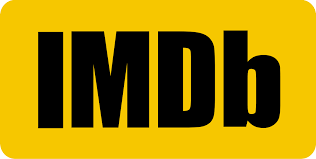

## USING DEEP NEURAL NETS
<img src="https://miro.medium.com/max/1199/1*N8UXaiUKWurFLdmEhEHiWg.jpeg">

On a daily basis, billions of text data that express sentiment are
generated on the internet through social media and the entertainment industry.
Analyzing how a customer feels about a drama, tv series and movies are really
important to the entertainment industry. For instance, in case of movies, a movie
production company may need to know how customers feel about their movie. This
evaluation could be done through criteria such as was the movie good or bad, were
there parts of the movie that were good or bad, did the actors perform good or bad
and several other criteria. One way to evaluate these criteria would be through the
movie reviews left by customers. These reviews could be used to analyze the criteria
mentioned earlier. This analysis could be used to make changes in future movies
such as selecting an actor for a particular genre of movie, which part of movie should
be used for movie previews to attract people. This eventually will lead to increased
revenue for movie production companies. Thus the extreme need for Sentiment
analysis on movie review. The most popular platform today where people leave
movies reviews is IMDB. This project will analyze IMDB movie reviews and in a
broader sense will analyze whether a review for a movie is positive or negative. The
basic steps involve data mining and then training a machine learning model to
recognize whether a given movie’s review is positive or negative. Then the model
can predict whether a given review was positive or negative

## Task1: Load Data

In [37]:
import pandas as pd #for data container

In [38]:
raw_reviews_df = pd.read_csv("imdb_reviews.csv") #read from csv file

In [39]:
raw_reviews_df.shape #view dimensions of the pandas daframe

(50000, 2)

In [40]:
raw_reviews_df.iloc[0:1] #view one movie review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [41]:
raw_reviews_df.info() #vew information abot Daframe in general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Task2: Preprocess Data

In [42]:
from matplotlib import pyplot as plt#to plot histogram

Text(0, 0.5, 'Number of samples')

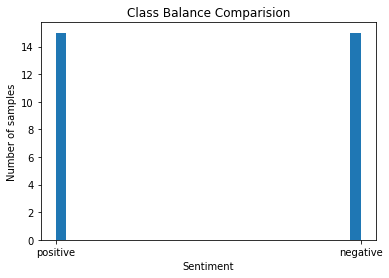

In [7]:
plt.hist(raw_reviews_df["sentiment"],density=True,bins=30)
plt.title("Class Balance Comparision")
plt.xlabel("Sentiment")
plt.ylabel("Number of samples")

In [13]:
print("Total Samples for Positive Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="positive"]))
print("Total Samples for Negative Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="negative"]))

Total Samples for Positive Sentiments:  25000
Total Samples for Negative Sentiments:  25000


In [14]:
print("Total Samples which do not have reviews: ",len(raw_reviews_df[raw_reviews_df["review"]==None]))

Total Samples which do not have reviews:  0


In [15]:
from wordcloud import WordCloud #library that allows word cloud to be generated

In [16]:
#convert the column specified by column_name in dataset_df(dataframe) to list
sentences_list = (raw_reviews_df[raw_reviews_df["sentiment"]=="negative"])["review"].tolist()

In [18]:
#convert a list to sentence
sentences_single_string = " ".join(sentences_list)

Text(0.5, 1.0, 'Negative Reviews')

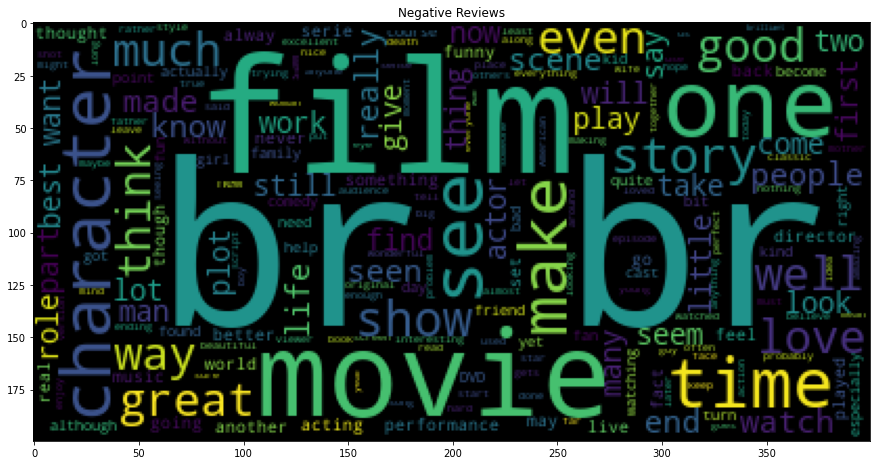

In [30]:
#plot word cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_single_string))
plt.title("Negative Reviews")

In [31]:
#convert the column specified by column_name in dataset_df(dataframe) to list
sentences_list = (raw_reviews_df[raw_reviews_df["sentiment"]=="positive"])["review"].tolist()

In [32]:
#convert a list to sentence
sentences_single_string = " ".join(sentences_list)

Text(0.5, 1.0, 'Positive Reviews')

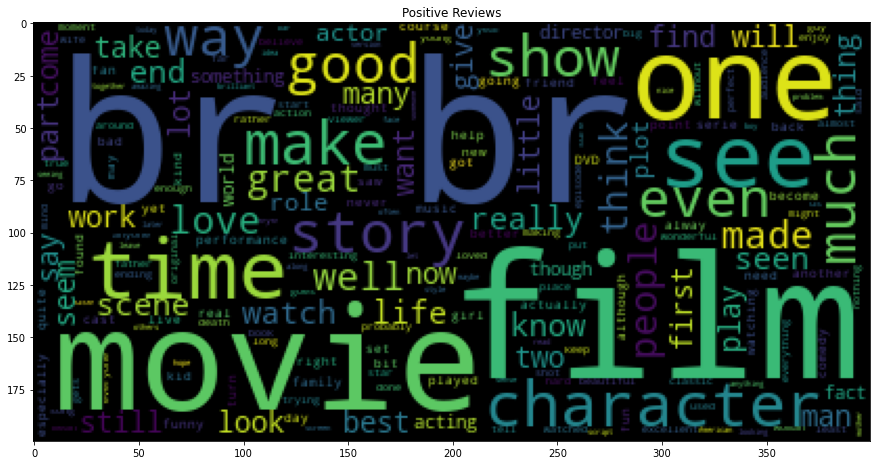

In [33]:
#plot word cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_single_string))
plt.title("Positive Reviews")

In [34]:
def generate_word_cloud(dataframe_df,column_name):
    """ This function generates word cloud
    
    Args:
        dataframe: the datafram object which contains column whose word cloud is to be generated
        column_name: the name of the column in dataframw whose cloud is to be generated
        
    Returns:
        None
    """
    #convert the column specified by column_name in dataset_df(dataframe) to list
    sentences_list = dataframe_df[column_name].tolist()
    
    #convert a list to sentence
    sentences_single_string = " ".join(sentences_list)
    
    #plot word cloud
    plt.figure(figsize=(15,15))
    plt.imshow(WordCloud().generate(sentences_single_string))
    plt.title("Word Cloud For " +  column_name)

## Task3: Text Preprocessing

In part, text preprocessing tasks such as removing stopwords, punctuation is done

In [36]:
import string